---
# <center> Лабораторна робота №10 </center>
## **Тема. Стиснення даних. Жадібна стратегія на прикладі кодування Гафмена**
## **Мета:** навчитись реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.
### _Викoнав Данііл Танасієнко 12.12.24_
---

## <center> Хід роботи </center>

### **1.** Створюємо Notebook-документ і реалізовуємо контрольні приклади, що розглядаються у цій роботі, та виконуємо завдання, що надано на самостійну роботу.
### <center> Завдання для самостійної роботи </center>

#### **1)** Будуємо дерево кодів Гафмена згідно з варіантом, виданим викладачем вручну і візуалізовуємо дерево.

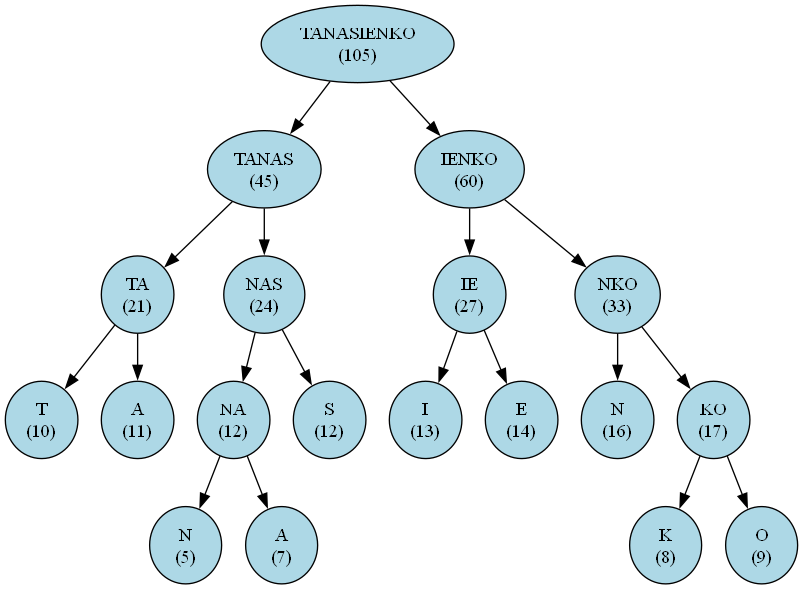

In [23]:
import heapq
from graphviz import Digraph
from IPython.display import display, Image

# Клас для вузла дерева Гаффмана
class HuffmanNode:
    def __init__(self, frequency, symbol, left=None, right=None):
        self.frequency = frequency
        self.symbol = symbol
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.frequency < other.frequency

# Функція для побудови дерева Гаффмана
def build_huffman_tree(symbols, frequencies):
    priority_queue = []
    for sym, freq in zip(symbols, frequencies):
        heapq.heappush(priority_queue, HuffmanNode(freq, sym))

    while len(priority_queue) > 1:
        node_left = heapq.heappop(priority_queue)
        node_right = heapq.heappop(priority_queue)
        merged_node = HuffmanNode(node_left.frequency + node_right.frequency, node_left.symbol + node_right.symbol, node_left, node_right)
        heapq.heappush(priority_queue, merged_node)

    return priority_queue[0]

# Функція для побудови графу дерева Гаффмана
def add_nodes_to_graph(graph, node, parent_label=None):
    if node:
        label = f"{node.symbol}\n({node.frequency})"
        graph.node(label, shape="ellipse", style="filled", fillcolor="lightblue")
        if parent_label:
            graph.edge(parent_label, label)
        add_nodes_to_graph(graph, node.left, label)
        add_nodes_to_graph(graph, node.right, label)

# Функція для генерації та відображення дерева Гаффмана
def generate_huffman_graph(root_node):
    graph = Digraph(format="png")
    add_nodes_to_graph(graph, root_node)
    return graph

# Символи та їх частоти для слова "TANASIENKO"
symbols = ['T', 'S', 'O', 'A', 'E', 'N', 'K', 'A', 'I', 'N']
frequencies = [10, 12, 9, 7, 14, 5, 8, 11, 13, 16]

# Створення дерева Гаффмана
huffman_root = build_huffman_tree(symbols, frequencies)

# Створення графу дерева Гаффмана
tree = generate_huffman_graph(huffman_root)

# Відображення графу
display(Image(tree.pipe(format='png')))


#### **2)** Перевіряємо результат за допомогою коду, наведеному вище.

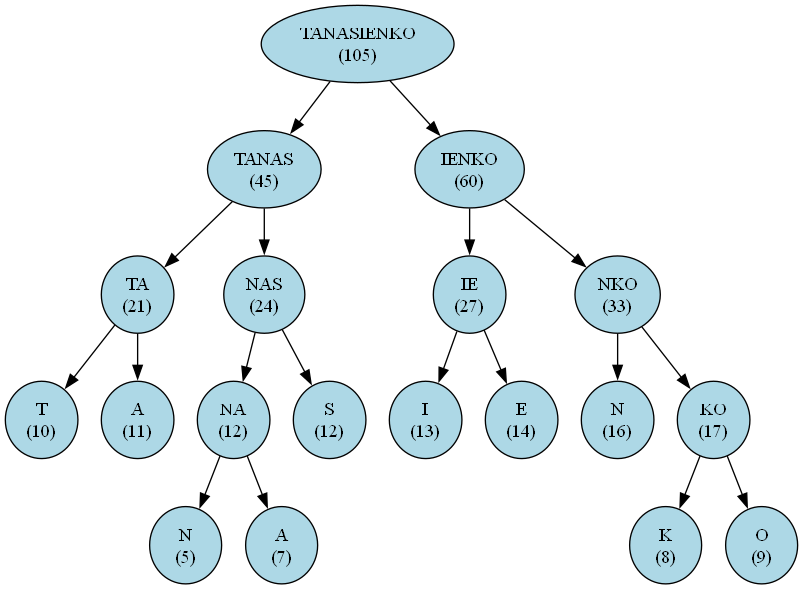

Huffman Codes:
T -> 000
A -> 001
N -> 0100
A -> 0101
S -> 011
I -> 100
E -> 101
N -> 110
K -> 1110
O -> 1111


In [29]:
import heapq
from graphviz import Digraph
from IPython.display import display, Image

# Клас для вузла дерева Гаффмана
class HuffmanNode:
    def __init__(self, frequency, symbol, left=None, right=None):
        self.frequency = frequency
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''  # Атрибут для коду символу

    def __lt__(self, other):
        return self.frequency < other.frequency

# Функція для побудови дерева Гаффмана
def create_huffman_tree(symbols, frequencies):
    heap = []
    for symbol, freq in zip(symbols, frequencies):
        heapq.heappush(heap, HuffmanNode(freq, symbol))

    while len(heap) > 1:
        left_node = heapq.heappop(heap)
        right_node = heapq.heappop(heap)
        
        # Призначаємо коди вузлам
        left_node.huff = '0'
        right_node.huff = '1'

        merged_node = HuffmanNode(left_node.frequency + right_node.frequency, left_node.symbol + right_node.symbol, left_node, right_node)
        heapq.heappush(heap, merged_node)

    return heap[0]

# Додавання вузлів до графа для візуалізації
def populate_graph(graph, node, parent_label=None):
    if node is not None:
        node_label = f"{node.symbol}\n({node.frequency})"
        graph.node(node_label, shape="ellipse", style="filled", fillcolor="lightblue")
        if parent_label:
            graph.edge(parent_label, node_label)
        populate_graph(graph, node.left, node_label)
        populate_graph(graph, node.right, node_label)

# Візуалізація дерева Гаффмана
def render_huffman_tree(root_node):
    huffman_graph = Digraph(format="png")
    populate_graph(huffman_graph, root_node)
    return huffman_graph

# Функція для виводу кодів Гаффмана
def print_huffman_codes(node, val=''):
    if node is not None:
        new_val = val + node.huff
        if node.left is None and node.right is None:
            print(f"{node.symbol} -> {new_val}")
        print_huffman_codes(node.left, new_val)
        print_huffman_codes(node.right, new_val)

# Символи та їх частоти для слова "TANASIENKO"
symbols = ['T', 'S', 'O', 'A', 'E', 'N', 'K', 'A', 'I', 'N']
frequencies = [10, 12, 9, 7, 14, 5, 8, 11, 13, 16]

# Побудова дерева Гаффмана
huffman_root = create_huffman_tree(symbols, frequencies)

# Генерація та відображення графа
tree_graph = render_huffman_tree(huffman_root)

display(Image(tree_graph.pipe(format='png')))

# Виведення кодів Гаффмана
print("Huffman Codes:")
print_huffman_codes(huffman_root)


#### **3)** Написати процедуру на Python, яка для вхідного повідомлення обчислює список символів chars та список їх частот freq



In [7]:
from collections import Counter

def compute_char_frequencies(message):
    # Обчислюємо частоти символів за допомогою Counter
    counter = Counter(message)
    
    # Створюємо список символів та їх частот
    chars = list(counter.keys())
    freq = list(counter.values())
    
    return chars, freq

# Приклад використання
message = "hello world"
chars, freq = compute_char_frequencies(message)

print("Символи:", chars)
print("Частоти:", freq)




Символи: ['h', 'e', 'l', 'o', ' ', 'w', 'r', 'd']
Частоти: [1, 1, 3, 2, 1, 1, 1, 1]


#### **4)** Опрацьовуємо самостійно тему декодування Гафмена і скориставшись наведеним там кодом, декодуємо повідомлення, задане варіантом. (AMO)


In [10]:
import heapq
from collections import defaultdict

# Побудова дерева Хаффмана
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(text):
    # Обчислення частоти символів
    freq = defaultdict(int)
    for char in text:
        freq[char] += 1

    # Створення пріоритетну чергу для побудови дерева
    heap = [Node(char, f) for char, f in freq.items()]
    heapq.heapify(heap)

    # Створення дерева Хаффмана
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    return heap[0]

# Генерація таблиці кодів
def generate_codes(node, current_code='', codebook={}):
    if node is None:
        return codebook
    if node.char is not None:
        codebook[node.char] = current_code
    generate_codes(node.left, current_code + '0', codebook)
    generate_codes(node.right, current_code + '1', codebook)
    return codebook

# Декодування повідомлення
def decode_huffman(encoded_text, root):
    decoded_text = ''
    current_node = root
    for bit in encoded_text:
        if bit == '0':
            current_node = current_node.left
        else:
            current_node = current_node.right

        if current_node.char is not None:
            decoded_text += current_node.char
            current_node = root  # Повертаємось до кореня дерева після кожного символу

    return decoded_text


if __name__ == "__main__":
    # Задано вихідне слово "amo"
    text = "amo"

    # Побудова дерева Хаффмана
    root = build_huffman_tree(text)

    # Генерація таблиці кодів
    huffman_codes = generate_codes(root)
    print("Таблиця кодів Хаффмана:")
    for char, code in huffman_codes.items():
        print(f"{char}: {code}")

    # Зашифроване повідомлення 
    encoded_message = ''.join(huffman_codes[char] for char in text)

    print("\nЗашифроване повідомлення:")
    print(encoded_message)

    # Декодування повідомлення
    decoded_message = decode_huffman(encoded_message, root)

    print("\nДекодоване повідомлення:")
    print(decoded_message)



Таблиця кодів Хаффмана:
a: 0
o: 10
m: 11

Зашифроване повідомлення:
01110

Декодоване повідомлення:
amo


### **2.** Надаємо відповіді на контрольні запитання.
### <center> Контрольні питання </center>

#### **1)** Що таке жадібні алгоритми?
# Жадібні алгоритми

Жадібні алгоритми (greedy algorithms) — це методи розв'язування задач, де на кожному кроці вибирається локально оптимальне рішення, сподіваючись, що це призведе до глобального оптимуму.

## Основні характеристики:
- **Локальна оптимальність**: вибір найкращого варіанту на кожному етапі.
- **Проста реалізація**.
- **Не гарантують глобального оптимального рішення** для всіх задач.

## Приклад задачі:
- **Задача про монети**: вибір монет найменших номіналів для досягнення заданої суми.


#### **2)** Що таке префіксний код? Який код використовується у коді Гаффмена?
# Префіксний код

**Префіксний код** — це тип кодування, в якому жоден код не є префіксом іншого. Тобто, жоден код, який представляє символ або послідовність, не є початком іншого коду в наборі.

Це важливо для правильного декодування, оскільки кожен код можна однозначно і без помилок інтерпретувати.

## Код Гаффмена

**Код Гаффмена** є префіксним кодом, який використовується для стиснення даних. Алгоритм Гаффмена призначений для кодування символів з різними ймовірностями, надаючи коротші коди для більш ймовірних символів і довші для менш ймовірних. Він гарантує оптимальне стиснення за умови, що коди є префіксними.

### Особливості коду Гаффмена:
- **Префіксність**: жоден код не є префіксом іншого.
- **Оптимальність**: мінімізує середню довжину коду для заданих ймовірностей.



#### **3)** Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»?
##### Зв'язок між структурою даних "купа" і "черга з пріоритетами"

**Куча** (heap) — це структура даних, яка підтримує операції пошуку мінімального (або максимального) елемента за час O(1) та вставки й видалення елементів за час O(log n). Куча зазвичай реалізується у вигляді двійкової купи (binary heap).

**Черга з пріоритетами** (priority queue) — це структура даних, що дозволяє виконувати операції вставки елементів і вилучення елементів з найвищим пріоритетом (максимум або мінімум) за час $O(log n)$.

## Зв'язок:
- **Куча** є стандартною реалізацією **черги з пріоритетами**.
- Черга з пріоритетами організована так, що елементи з вищим пріоритетом завжди доступні для вилучення першими, і для цього часто використовується **двійкова куча**.
- У **мінімальній купі** найменший елемент має найвищий пріоритет, у **максимальній купі** — найбільший.

Таким чином, черга з пріоритетами використовує купу для збереження елементів та швидкого доступу до елементів з найвищим пріоритетом.


#### **4)** Що таке стиснення даних і для чого воно використовується? Які його основні переваги?


**Стиснення даних** — це процес зменшення обсягу даних для ефективнішого зберігання або передачі. Воно може бути **без втрат** (lossless) або **із втратами** (lossy).

## Використання:
- **Збереження місця на диску**.
- **Швидша передача даних**.
- **Оптимізація ресурсів**.

## Переваги:
1. **Економія місця** на носіях.
2. **Швидша передача** через мережу.
3. **Зниження витрат** на зберігання.
4. **Зменшення навантаження** на системи.


#### **5)** Які кроки необхідно виконати для стиснення даних за допомогою алгоритму кодування Гаффмена?
##### Кроки для стиснення даних за допомогою алгоритму кодування Гаффмена

1. **Підрахувати частоту символів**: Аналізуємо вхідні дані та визначаємо кількість появ кожного символу.

2. **Побудувати дерево Гаффмена**:
   - Створюємо вузли для кожного символу, де кожен вузол містить символ і його частоту.
   - Побудова дерева відбувається шляхом комбінування двох вузлів з найменшою частотою, поки не залишиться один вузол — корінь дерева.

3. **Призначити бінарні коди**: Призначаємо бінарні коди кожному символу, проходячи дерево від кореня до листя, де кожен крок ліворуч означає додавання 0, а праворуч — 1.

4. **Заміна символів кодами**: Відповідно до отриманих бінарних кодів, замінюємо кожен символ вхідних даних на його код.

5. **Зберігання або передача**: Відправляємо або зберігаємо стиснуті дані разом з необхідною інформацією для декодування (наприклад, дерево Гаффмена або таблицю кодів).


#### **6)** Які основні обмеження та недоліки алгоритму кодування Гаффмена? Чи можливо покращити його продуктивність?
Алгоритм Гаффмена має певні обмеження:
- Потребує зберігання дерева.
- Ефективний лише при різних частотах символів.
- Малоефективний для невеликих даних.
- Не враховує більші структури даних.

Для покращення ефективності застосовують:
- **Адаптивне кодування**.
- **Арифметичне кодування**.
- Комбінацію з іншими методами, наприклад, **RLE** (Run-Length Encoding).


#### **7)** . Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гаффмена?
# Альтернативні методи стиснення даних:

1. **Арифметичне кодування** — ефективне для даних з різними ймовірностями символів.
2. **Алгоритм Лемпеля-Зіва (LZ77, LZ78)** — стискає повторювані послідовності.
3. **RLE (Run-Length Encoding)** — стискає довгі послідовності однакових символів.
4. **Блокове кодування** — стискає великі блоки даних (наприклад, **JPEG**).
5. **Біографічне стиснення (BWT)** — перетворення даних перед стисненням.


#### **8)** Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гаффмена, у сучасних інформаційних системах?

1. **Стиснення файлів**:
   - Алгоритм Гаффмена використовується в програмних інструментах для стиснення файлів, таких як **ZIP** і **gzip**.

2. **Передача даних через мережу**:
   - Алгоритми стиснення (в тому числі Гаффмен) застосовуються для зменшення обсягу переданих даних у мережах, знижуючи витрати на передачу і підвищуючи швидкість завантаження (наприклад, при стисненні текстових даних в веб-браузерах).

3. **Стиснення зображень та відео**:
   - Стиснення зображень, наприклад, за допомогою методів, схожих на алгоритм Гаффмена, може використовуватися в форматах **JPEG** або **PNG** для оптимізації зберігання.

4. **Мобільні та веб-додатки**:
   - Використовуються для оптимізації даних, що передаються між сервером і клієнтським додатком, зокрема для текстових повідомлень, зображень та мультимедіа.

5. **Зберігання даних в базах даних**:
   - Алгоритми стиснення допомагають зменшити обсяг даних, що зберігаються в базах даних, оптимізуючи використання пам'яті.

6. **Аудіо та відео кодування**:
   - Стиснення мультимедійних файлів, таких як **MP3**, **MP4**, для економії місця і зменшення пропускної здатності при трансляціях.

7. **Ігри та програмне забезпечення**:
   - Для стиснення даних і ресурсів, що використовуються в іграх або програмах, дозволяючи зменшити обсяг завантажуваних файлів.

Алгоритм Гаффмена і подібні методи активно використовуються для зменшення розміру даних без значної втрати якості, що робить їх важливими для сучасних інформаційних систем.
